In [2]:
import numpy as np
import matplotlib.pyplot as plt


# BB-Neucleosynthesis

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('SM_Thermo.dat', sep='\s+\\s+')
#df.to_csv ('SM_2.dat', index=None)

C:\Users\ashish\AppData\Local\Temp\ipykernel_15480\2847246472.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('SM_Thermo.dat', sep='\s+\\s+')


In [5]:
df.head()

,t (s),T_gam (MeV),T_gam/T_nu,g*,gs,a,z_gam,z_nu,N
0,0.007387,10.000000,1.000000,10.736124,10.735804,0.051101,1.000024,1.000024,0.000407
1,0.007524,9.908319,1.000000,10.736112,10.735786,0.051574,1.000025,1.000024,0.000414
2,0.007664,9.817479,1.000000,10.736099,10.735768,0.052051,1.000025,1.000025,0.000421
3,0.007806,9.727472,1.000001,10.736086,10.735749,0.052533,1.000026,1.000025,0.000429
4,0.007952,9.638290,1.000001,10.736073,10.735729,0.053019,1.000026,1.000026,0.000437


In [6]:
min(df['t (s)'])

0.0073866869

In [7]:
z_gam=df["z_gam"]
z_nu=df["z_nu"]
gs=df["gs"]
g=df["g*"]
m_e=0.511
m_p=1.2*10**(22)
T_gam=df['T_gam (MeV)']
T_nu=np.multiply(1/df["T_gam/T_nu"],df["T_gam (MeV)"])
z_new=m_e/T_nu
z_gam2=m_e/T_gam



### 3. Trying to Plot $dz/dt$

In [8]:
# This function calculates the derivative of gs(z) using the finite difference method.
# It takes a dataframe 'df' as input and returns a list of derivative values.

def gprime_s(df):
    x = []
    for i in range(0, 1000, 1):
        # Check if the next value of z_new is different from the current value
        if z_new[i + 1] != z_new[i]:
            # Calculate the derivative using the finite difference formula
            derivative = (df["gs"][i + 1] - df["gs"][i]) / (z_new[i + 1] - z_new[i])
            x.append(derivative)
        else:
            # If the next value of z_new is the same, append the previous derivative value
            x.append(x[i - 1])
    return x
x=gprime_s(df)
x.append(0)

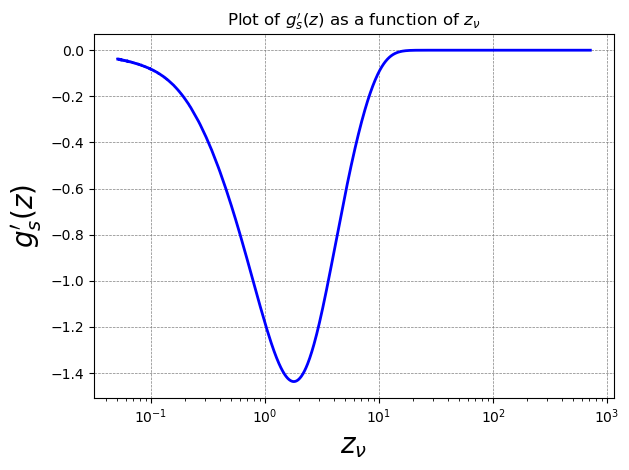

In [9]:
plt.plot(z_new, x, color='blue', linewidth=2)
plt.xscale('log')
plt.xlabel(r'$z_\nu$',fontsize=20)
plt.ylabel(r'$g^{\prime}_{s}(z)$',fontsize=20)
plt.title(r'Plot of $g^{\prime}_{s}(z)$ as a function of $z_\nu$')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.tight_layout()
plt.savefig('gprime_nu.png',dpi=600)

* Trying to plot from the functional form of Temperature $tT^{2}=\frac{2.4}{\sqrt(g(T))}$

Text(0, 0.5, '$t\\, (s)$')

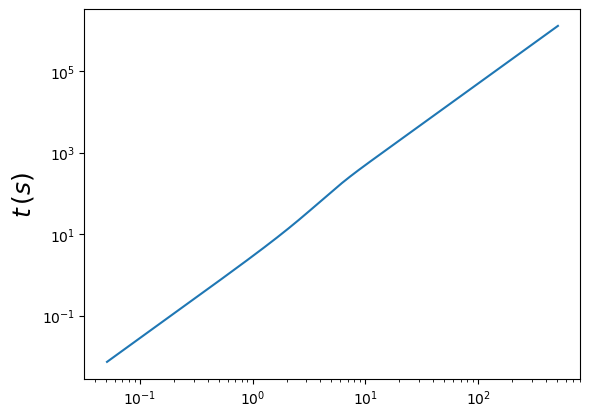

In [10]:
t=(2.4*(1/np.sqrt(g))*z_gam2**(2))/m_e**(2)
plt.plot(z_gam2,t)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$t\, (s)$',fontsize=18)

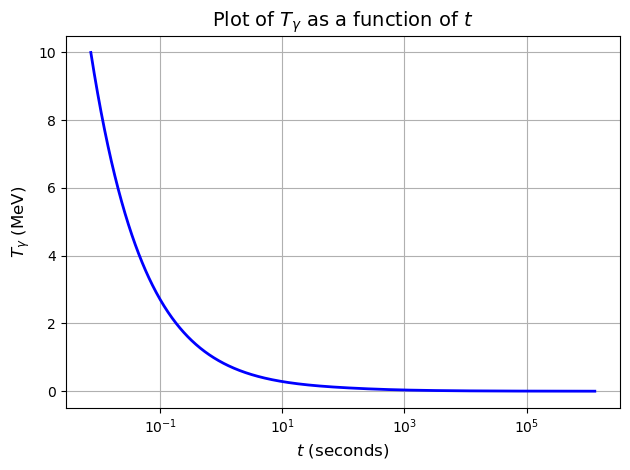

In [11]:
plt.plot(t, df["T_gam (MeV)"], color='blue', linewidth=2)
plt.xscale("log")
plt.xlabel("$t$ (seconds)", fontsize=12)
plt.ylabel("$T_{\gamma}$ (MeV)", fontsize=12)
plt.title("Plot of $T_{\gamma}$ as a function of $t$", fontsize=14)
plt.grid(True)
plt.tight_layout()

plt.show()



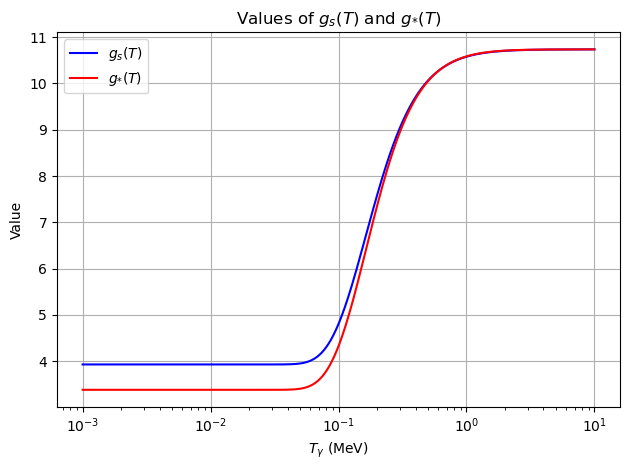

In [12]:
# Plotting the data
plt.plot(df["T_gam (MeV)"], gs, color='blue', label=r'$g_s(T)$')
plt.plot(df["T_gam (MeV)"], g, color='red', label=r'$g_{*}(T)$')

# Adding labels and title
plt.xlabel(r'$T_{\gamma}$ (MeV)')
plt.ylabel('Value')  # You can update the y-axis label as needed
plt.title('Values of $g_s(T)$ and $g_{*}(T)$')

# Setting a logarithmic scale for the x-axis
plt.xscale("log")

# Adding a legend
plt.legend(loc='best')

# Adding grid lines
plt.grid(True)

# Adjusting plot margins
plt.tight_layout()

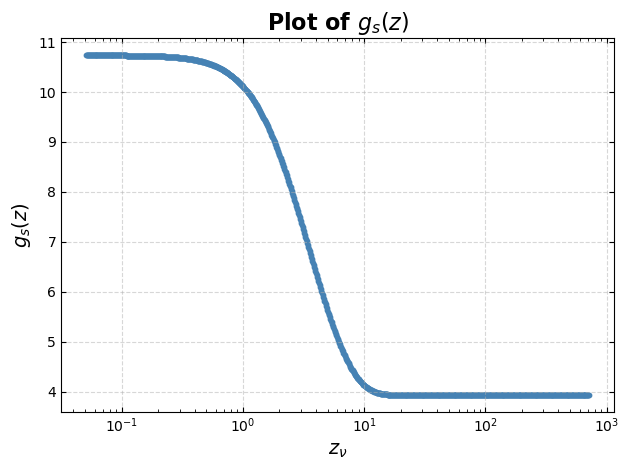

In [13]:
# Plotting the g_{s}(z) from the data given, to interpolate it
plt.scatter(z_new, gs, s=10, color='steelblue')

# Adding labels and title
plt.xlabel(r'$z_{\nu}$', fontsize=14)
plt.ylabel(r'$g_{s}(z)$', fontsize=14)
plt.title('Plot of $g_{s}(z)$', fontsize=16, fontweight='bold')

# Setting a logarithmic scale for the x-axis
plt.xscale('log')

# Customize the tick parameters
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusting plot margins
plt.tight_layout()
plt.savefig('gsz_nu',dpi=600)

###  Plotting:  $\frac{dt}{dz}=\frac{\bigg(-z^{2}\frac{1}{3}\frac{g'_{s}(z)}{g_{s}(z)}+z\bigg)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$

## $\frac{m_{pl}}{m_{e}^{2}}=\frac{1.22 \times 10^{22}}{(0.511)^{2}}$

In [14]:
cons=1.22*10**(22)/(0.511)**2

In [15]:
func=cons*((z_new**(2))*1/3*np.divide(x,df['gs'])+z_new)/(1.66*np.sqrt(df['g*']))

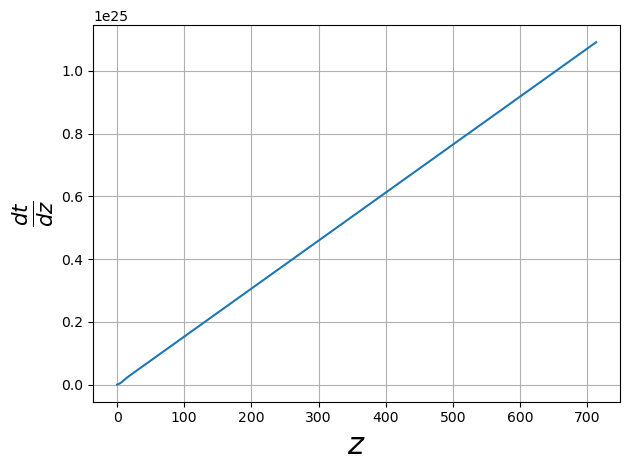

In [16]:
plt.plot(z_new,func)
#plt.title(r'$\frac{dt}{dz} v/s z$')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel(r'$\frac{dt}{dz}$',fontsize=22)
plt.xlabel(r'$z$',fontsize=22)
plt.grid(True)
plt.tight_layout()


In [17]:
from scipy import interpolate
f=interpolate.interp1d(z_new,gs)
#since we know max(z_new) and min(z_new), we can put that into the followin
x_new=np.linspace(0.051100020440000005,713.2453684999999,10000)
ynew=f(x_new)

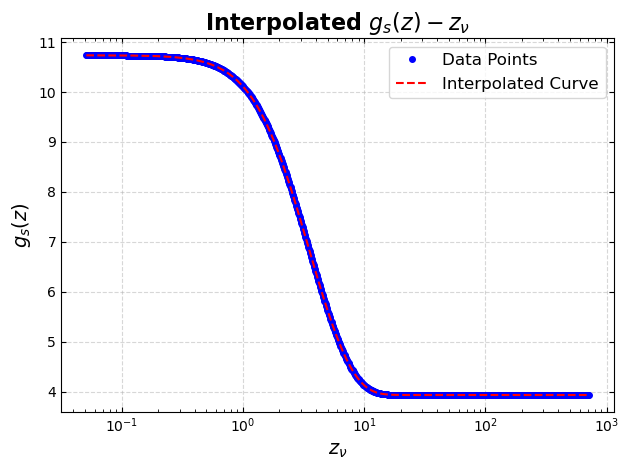

In [18]:
# Plotting the data points
plt.plot(z_new, df['gs'], 'o', markersize=4, color='blue', label='Data Points')


# Plotting the interpolated curve
plt.plot(x_new, ynew, '--', color='red', label='Interpolated Curve')

# Adding labels and title
plt.xlabel(r'$z_{\nu}$', fontsize=14)
plt.ylabel(r'$g_{s}(z)$', fontsize=14)
plt.title(r'Interpolated $g_{s}(z)-z_{\nu}$', fontsize=16, fontweight='bold')

# Setting a logarithmic scale for the x-axis
plt.xscale('log')

# Customize the tick parameters
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# Adding a legend
plt.legend(loc='best', fontsize=12)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusting plot margins
plt.tight_layout()
plt.savefig('intznu.png',dpi=400)


In [19]:
#differentiating the interpolated value of g_{s}(z)
def gprime_iplot(f,i):
    diff=(float(f(i+10**(-4)))-float(f(i)))/(10**(-4))
    return diff

In [20]:
new_y=[]
for i in range(0,1000,1):
    if(z_new[i+1]!=z_new[i]):
        new_y.append(gprime_iplot(f,z_new[i]))
    else:
        new_y.append(new_y[i-1])
new_y.append(0.0)

In [21]:
func2=cons*((z_new**(2))*1/3*np.divide(new_y,df['gs'])+z_new)/(1.66*np.sqrt(df['g*']))

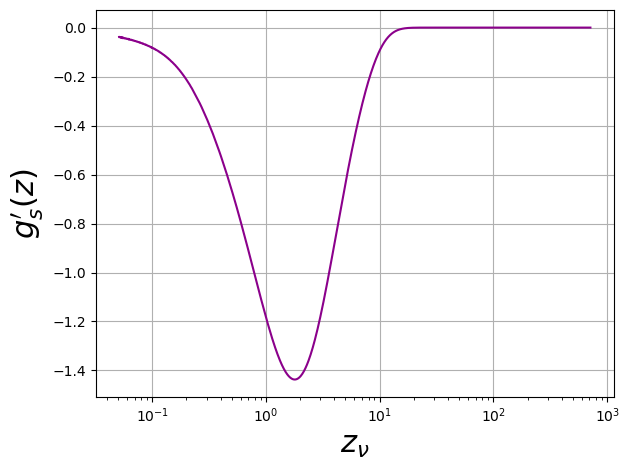

In [22]:
plt.plot(z_new,new_y,color='darkmagenta')
plt.xscale('log')
plt.ylabel(r'$g^{\prime}_{s}(z)$',fontsize=22)
plt.xlabel(r'$z_\nu$',fontsize=22)
plt.grid(True)

plt.tight_layout()
plt.savefig('gvaria_int',dpi=300)


* From the above method it is clear that from both the methods we are getting the same $g'_{s}(z)$, Now let's interpolate, so that we can integrate it we want to find relation between $t$ and $z$

In [23]:
# Interpolate gs'(z)

In [24]:
g_der_ipol=interpolate.interp1d(z_new,new_y)
g_der=g_der_ipol(x_new)

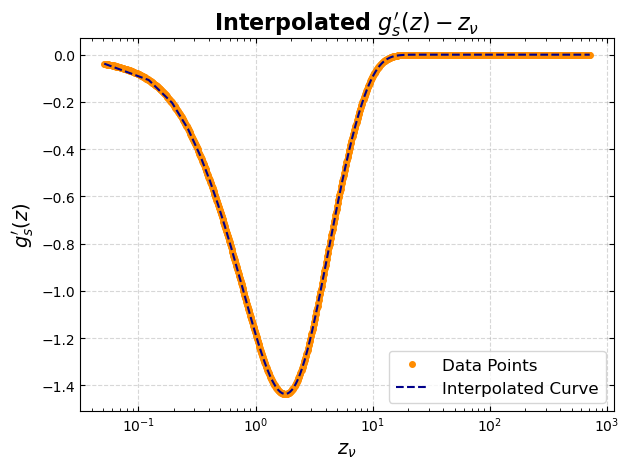

In [25]:
# Plotting the data points
plt.plot(z_new, new_y, 'o', markersize=4, color='darkorange', label='Data Points')


# Plotting the interpolated curve
plt.plot(x_new, g_der, '--', color='darkblue', label='Interpolated Curve')

# Adding labels and title
plt.xlabel(r'$z_{\nu}$', fontsize=14)
plt.ylabel(r'$g^{\prime}_{s}(z)$', fontsize=14)
plt.title(r'Interpolated $g^{\prime}_{s}(z)-z_{\nu}$', fontsize=16, fontweight='bold')

# Setting a logarithmic scale for the x-axis
plt.xscale('log')

# Customize the tick parameters
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# Adding a legend
plt.legend(loc='best', fontsize=12)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusting plot margins
plt.tight_layout()
plt.savefig('gprime_int',dpi=300)

In [26]:
# Interpolating g*(z)
g_star_ipol=interpolate.interp1d(z_new,g)
g_star=g_star_ipol(x_new)

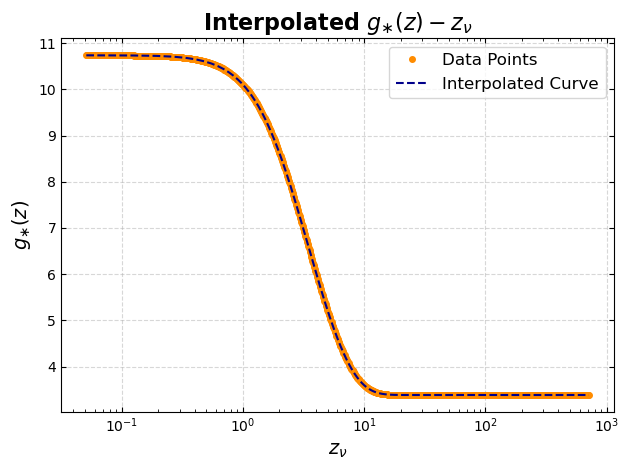

In [27]:
# Plotting the data points
plt.plot(z_new, g, 'o', markersize=4, color='darkorange', label='Data Points')


# Plotting the interpolated curve
plt.plot(x_new, g_star, '--', color='darkblue', label='Interpolated Curve')

# Adding labels and title
plt.xlabel(r'$z_{\nu}$', fontsize=14)
plt.ylabel(r'$g_{\ast}(z)$', fontsize=14)
plt.title(r'Interpolated $g_{\ast}(z)-z_{\nu}$', fontsize=16, fontweight='bold')

# Setting a logarithmic scale for the x-axis
plt.xscale('log')

# Customize the tick parameters
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# Adding a legend
plt.legend(loc='best', fontsize=12)

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Adjusting plot margins
plt.tight_layout()

plt.savefig('gstar_int',dpi=300)

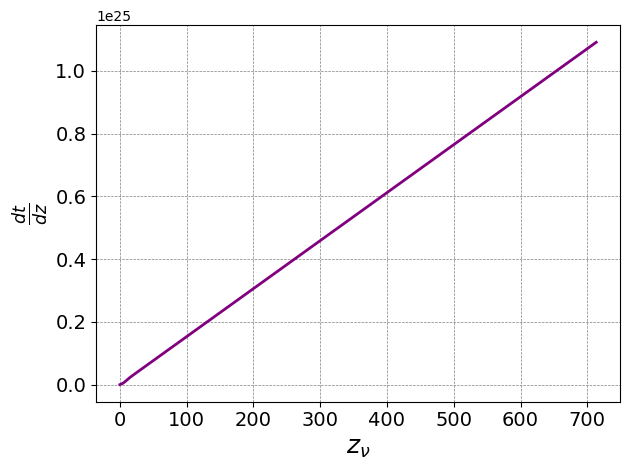

In [28]:
plt.plot(z_new, func2, color='purple', linewidth=2)
plt.ylabel(r'$\frac{dt}{dz}$', fontsize=18)
plt.xlabel(r'$z_{\nu}$', fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()


In [29]:
# solving for dt/dz
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid
integral=cumulative_trapezoid(func2,z_new,initial=0.07)

### Given:

$\frac{dt}{dz} = \frac{\left(-z^{2}\frac{1}{3}\frac{g'_{s}(z)}{g_{s}(z)}+z\right)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$

### Let:

$f(z) = \frac{\left(-z^{2}\frac{1}{3}\frac{g^{\prime}_{s}(z)}{g_{s}(z)}+z\right)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$

$\implies$

$\int dt = \int f(z) \, dz$


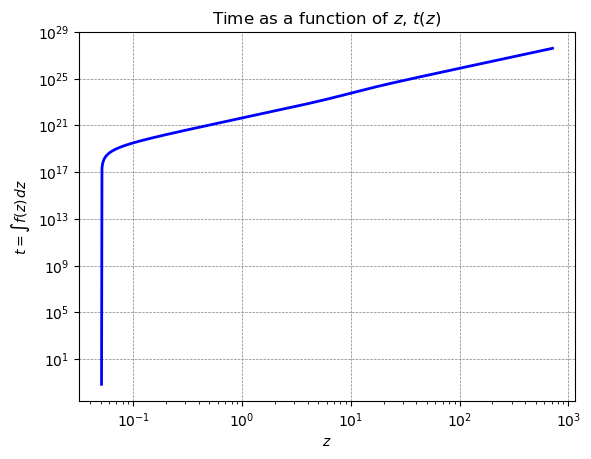

In [30]:
plt.plot(z_new, integral, color='blue', linewidth=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$t = \int f(z) \, dz$')
plt.title(r'Time as a function of $z$, $t(z)$')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
# converting it to seconds, plot in log log scale
plt.yscale('log')

plt.xscale('log')


In [31]:
cons2=4.8/m_e**(2)

In [32]:
func3=cons2*((z_new**(2))*1/3*np.divide(new_y,df['gs'])+z_new)/(np.sqrt(df['g*']))

In [33]:
integral3=cumulative_trapezoid(func3,z_new,initial=0)

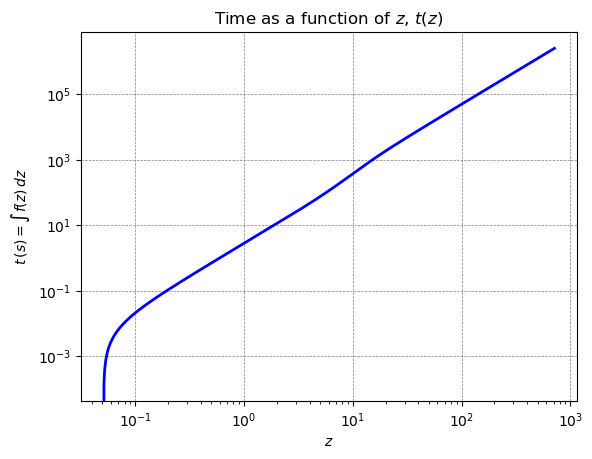

In [34]:
plt.plot(z_new, integral3, color='blue', linewidth=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$t\, (s) = \int f(z) \, dz$')
plt.title(r'Time as a function of $z$, $t(z)$')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
# converting it to seconds, plot in log log scale
plt.yscale('log')
plt.xscale('log')

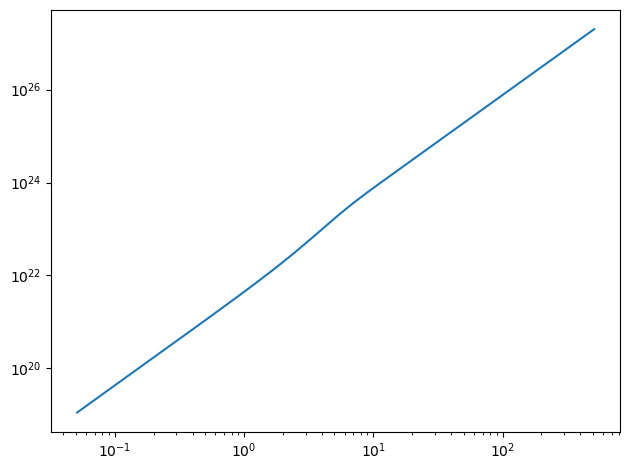

In [35]:
tas_z=cons*(z_gam2**(2)*(1/(1.66*np.sqrt(g))))/2
plt.plot(z_gam2,tas_z)

plt.yscale('log')
plt.xscale('log')
plt.tight_layout()

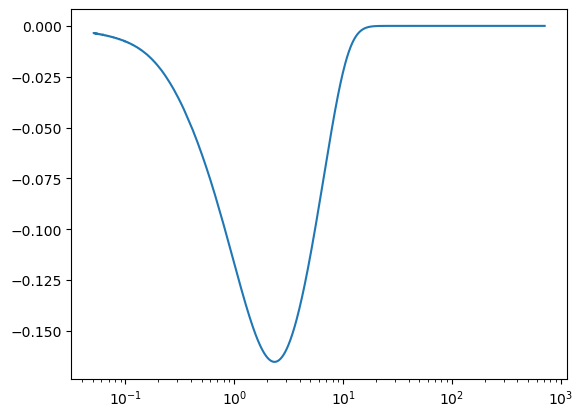

In [36]:
plt.plot(z_new,new_y/df['gs'])
plt.xscale('log')

In [37]:
#define z_int for a sorted array so that we could integrate the differential equation
z_int=np.sort(z_new)


In [38]:
from scipy.integrate import solve_ivp

In [39]:
def dtdz(z_int,t):
    return cons2*(-(z_int**(2))*1/3*np.divide(g_der_ipol(z_int),f(z_int))+z_int)/(np.sqrt(g_star_ipol(z_int)))

In [40]:
sol_m1=solve_ivp(dtdz,t_span=(min(z_new),max(z_new)),y0=[0.007387],t_eval=z_int)

In [41]:
t_znew=sol_m1.y[0]


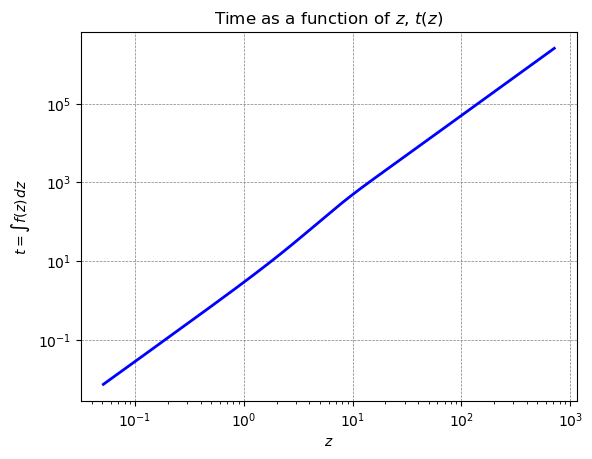

In [42]:
plt.plot(z_new,t_znew, color='blue', linewidth=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$t = \int f(z) \, dz$')
plt.title(r'Time as a function of $z$, $t(z)$')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.yscale('log')
plt.xscale('log')

### Logarithmic Plot of $t(z)$

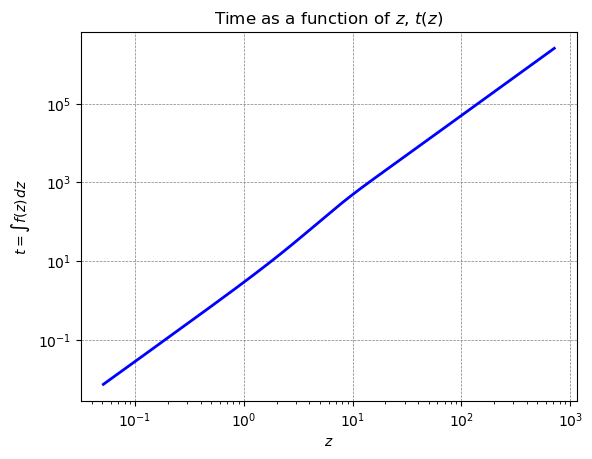

In [43]:
plt.plot(z_new,t_znew, color='blue', linewidth=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$t = \int f(z) \, dz$')
plt.title(r'Time as a function of $z$, $t(z)$')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)
plt.yscale('log')
plt.xscale('log')

## Neutron Abundance $X_{p}(z)$ in the Universe as a function of $z$

In [44]:
# defining a and b values as defined in serpico appendix,"https://iopscience.iop.org/article/10.1088/1475-7516/2004/12/010/pdf"

a_0 = 1
a_1 = 0.15735
a_2 = 4.6172
a_3 = -0.40520e2
a_4 = 0.13875e3
a_5 = -0.59898e2
a_6 = 0.66752e2
a_7 = -0.16705e2
a_8 = 3.8071
a_9 = -0.39140
a_10 = 0.023590
a_11 = -0.83696e-4
a_12 = -0.42095e-4
a_13 = 0.17675e-5
q_np = 0.33979

b_0 = -0.62173
b_1 = 0.22211e2
b_2 = -0.72798e2
b_3 = 0.11571e3
b_4 = -0.11763e2
b_5 = 0.45521e2
b_6 = -3.7973
b_7 = 0.41266
b_8 = -0.026210
b_9 = 0.87934e-3
b_10 = -0.12016e-4
q_pn = 2.8602
tau=8.7775e2
m_e=0.511

a_values = [a_0, a_1, a_2, a_3, a_4, a_5, a_6, a_7, a_8, a_9, a_10, a_11, a_12, a_13]
b_values = [b_0, b_1, b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_9, b_10]

Limiting the range of validity to $ 0.01 \leq T \leq 10 MeV$, we calculate the corresponding values of $z$ using the function below

In [45]:
znu = []
for x in z_int:
    if (1 / x) * m_e >= 0.01:
        znu.append(x)


#### Neutron Abundance
 $$\dot{X_{n}}=-\lambda_{np}X_{n}+\lambda_{pn}(1-X_{n})$$
* We have to solve the above equation using `dt/dz`, that we have found from the above prcedure
* In the above equation the $\lambda_{np}$ repersents the forward $n \leftrightarrow p$ and $\lambda_{pn}$ $ \implies $$p \leftrightarrow n$
* $$\frac{dt}{dz}=f(z)= \frac{\left(-z^{2}\frac{1}{3}\frac{g'_{s}(z)}{g_{s}(z)}+z\right)}{1.66 \sqrt{g_{\ast}(z)}}\frac{m_{pl}}{m_{e}^{2}}$$
* Multiplying the above equations we will get $$\frac{dX_{n}}{dz}= (-\lambda_{np}X_{n}+\lambda_{pn}(1-X_{n}))f(z)$$ 
##### try setting g' to 0

In [46]:
# Define the weak rate function for n <--> p
def lambda_np(z):
    value = 0
    for i in range(0, 14):
        value += a_values[i] * z ** (-i)
    w_rate = (value * np.exp(-q_np / z)) / tau
    return w_rate

# Define the weak rate function for p <--> n
def lambda_pn(z):
    value = 0
    e = (1 / z) * m_e
    if 0.1 <= e <= 10:
        for i in range(1, 11):
            value += b_values[i] * z ** (-i)
        weak_rate = (value * np.exp(-q_pn * z)) / tau
    elif 0.01 <= e < 0.1:
        weak_rate = 0
    return weak_rate

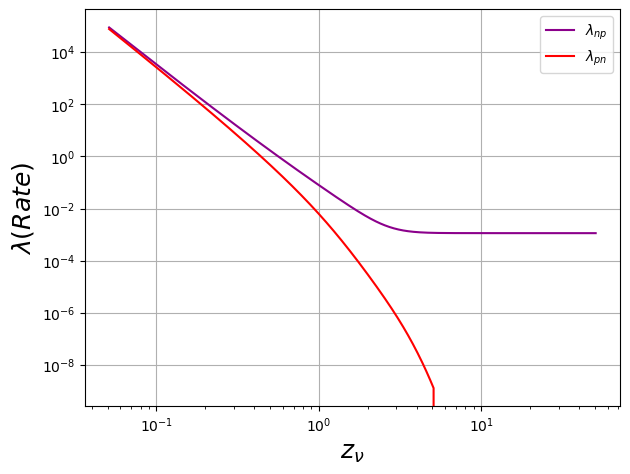

In [47]:
n_prate=[]
p_nrate=[]
for j in znu:
    n_prate.append(lambda_np(j))
    p_nrate.append(lambda_pn(j))
    
plt.plot(znu,n_prate,color='darkmagenta',label=r'$\lambda_{np}$')
plt.plot(znu,p_nrate,color='red',label=r'$\lambda_{pn}$')
plt.yscale('log')
plt.xlabel(r'$z_{\nu}$',fontsize=18)
plt.ylabel(r'$\lambda (Rate)$',fontsize=18)
plt.grid("True")
plt.tight_layout()
plt.xscale('log')
plt.legend()
    

    

* In the above plot we can see that for the small value of $z$, or at high temperature both the rates $n\leftrightarrow p$ and $p\leftrightarrow n$ converge, while for low temperature they are different. This is because at low temperature it becomes harder for a proton to convert to a neutron (because the proton has less mass), but a neutron can still decay into a proton. This is why the rate $\lambda_{np}$ becomes constant.


In [58]:
# defining f(z) that we have defined as dt/dz
def f_right(z):
    return cons2*(-(z**(2))*1/3*np.divide(g_der_ipol(z),f(z))+z)/(np.sqrt(g_star_ipol(z)))

#defining the differential equation
def dxdz(z,x):
    solution=lambda_pn(z)*f_right(z)-(lambda_np(z)+lambda_pn(z))*f_right(z)*x
    return solution
 

In [59]:
t=np.linspace(min(znu),max(znu),100)

In [60]:
sol_xz=solve_ivp(dxdz,t_span=(min(znu),max(znu)),y0=[0.5],t_eval=znu)

In [61]:
sol_xz

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1682
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.05110002,  0.05157284,  0.05205004,  0.05253166,  0.05301773,
        0.0535083 ,  0.0540034 ,  0.05450309,  0.05500741,  0.05551638,
        0.05603007,  0.05654852,  0.05707175,  0.05759983,  0.0581328 ,
        0.0586707 ,  0.05921357,  0.05976147,  0.06031444,  0.06087253,
        0.06143577,  0.06200423,  0.06257796,  0.06315698,  0.06374137,
        0.06433117,  0.06492642,  0.06552718,  0.0661335 ,  0.06674543,
        0.06736303,  0.06798633,  0.06861541,  0.0692503 ,  0.06989108,
        0.07053778,  0.07119046,  0.07184919,  0.07251401,  0.07318498,
        0.07386216,  0.0745456 ,  0.07523537,  0.07593152,  0.07663412,
        0.07734322,  0.07805888,  0.07878116,  0.07951012,  0.08024584,
        0.08098836,  0.08173774,  0.08249407,  0.08325739,  0.08402778,
        0.0848053 ,  0.08559

It appears that the scipy library is not suitable for this particular case, possibly due to the highly non-linear nature of the right-hand side. There could be some singularity present that I am currently unaware of.

In [62]:
x_znew=sol_xz.y[0]
print(x_znew)

[5.00000000e-01 4.64317228e-01 4.64376698e-01 4.64213473e-01
 4.63724715e-01 4.63449762e-01 4.63211730e-01 4.62639347e-01
 4.62650080e-01 4.62141175e-01 4.61666789e-01 4.61406713e-01
 4.61201072e-01 4.61155948e-01 4.60754525e-01 4.60780444e-01
 4.59795426e-01 4.60061144e-01 4.59664505e-01 4.59351150e-01
 4.59090925e-01 4.58692265e-01 4.58013562e-01 4.57887431e-01
 4.57653954e-01 4.57655636e-01 4.56810803e-01 4.56570095e-01
 4.56502152e-01 4.56115210e-01 4.55930525e-01 4.55347239e-01
 4.54755962e-01 4.54246821e-01 4.54348684e-01 4.53805764e-01
 4.53197680e-01 4.53072408e-01 4.52563029e-01 4.51994476e-01
 4.51908161e-01 4.51293346e-01 4.50818971e-01 4.50409009e-01
 4.49835160e-01 4.49433170e-01 4.49122250e-01 4.48586090e-01
 4.48836767e-01 4.48055754e-01 4.47376084e-01 4.47057715e-01
 4.46774385e-01 4.46044438e-01 4.45963797e-01 4.45092672e-01
 4.44736638e-01 4.44120462e-01 4.44191758e-01 4.43363861e-01
 4.42856673e-01 4.42531164e-01 4.42046756e-01 4.41319377e-01
 4.40849153e-01 4.404573

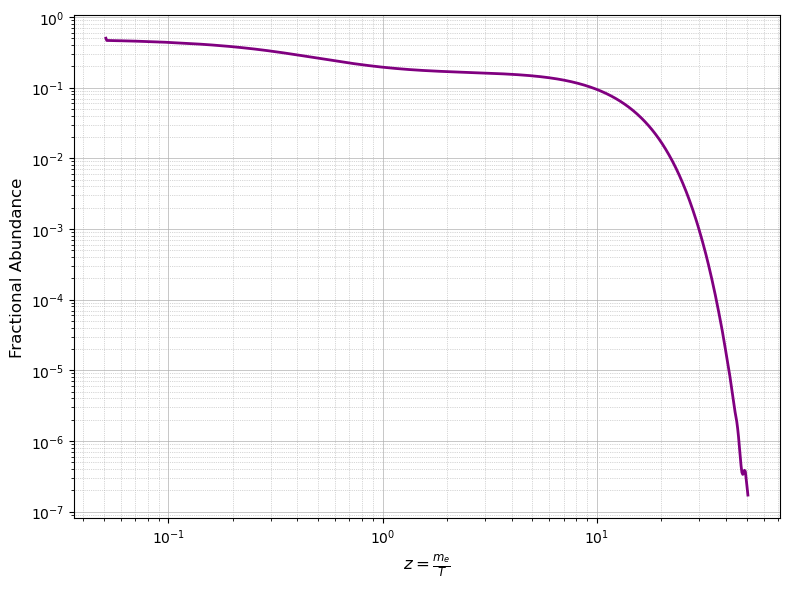

In [66]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(znu, x_znew, color='purple', linewidth=2)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'$z=\frac{m_e}{T}$', fontsize=12)
ax.set_ylabel('Fractional Abundance', fontsize=12)


ax.grid(True, which='both', linestyle='-', linewidth=0.5)
ax.grid(True, which='minor', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


Let's attempt to implement the Runge-Kutta method from scratch, following the guidance provided in the book `Computational Physics` by R Landau.

`Q: It seems this is also blowing up, and the reason is not clear` 